# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Clean Data

In [2]:
df = pd.read_csv(r"C:\Users\Dickson\Student Performance Factor\data\raw\StudentPerformanceFactors.csv")

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [5]:
df.shape

(6607, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

fill in missing values

In [8]:
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])

In [9]:
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

In [10]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])

In [11]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

# Exploratory Data Analysis

In [12]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for Parental_Involvement:
Medium    3362
High      1908
Low       1337
Name: Parental_Involvement, dtype: int64

Value counts for Access_to_Resources:
Medium    3319
High      1975
Low       1313
Name: Access_to_Resources, dtype: int64

Value counts for Extracurricular_Activities:
Yes    3938
No     2669
Name: Extracurricular_Activities, dtype: int64

Value counts for Motivation_Level:
Medium    3351
Low       1937
High      1319
Name: Motivation_Level, dtype: int64

Value counts for Internet_Access:
Yes    6108
No      499
Name: Internet_Access, dtype: int64

Value counts for Family_Income:
Low       2672
Medium    2666
High      1269
Name: Family_Income, dtype: int64

Value counts for Teacher_Quality:
Medium    4003
High      1947
Low        657
Name: Teacher_Quality, dtype: int64

Value counts for School_Type:
Public     4598
Private    2009
Name: School_Type, dtype: int64

Value counts for Peer_Influence:
Positive    2638
Neutral     2592
Negative    1377
Name: Peer_I

# Basic Visualizations

<Axes: xlabel='Hours_Studied', ylabel='Count'>

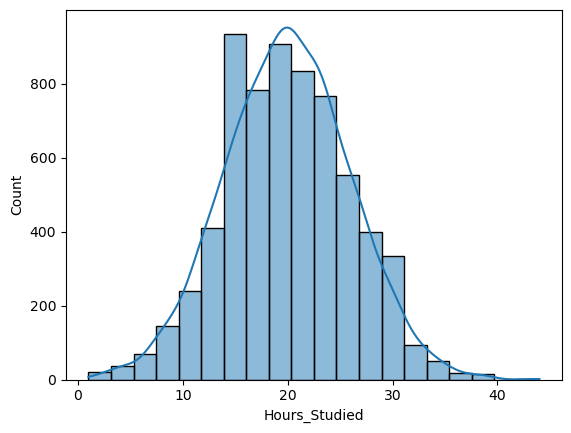

In [13]:
sns.histplot(df['Hours_Studied'], bins=20, kde=True)

<Axes: xlabel='Exam_Score', ylabel='Count'>

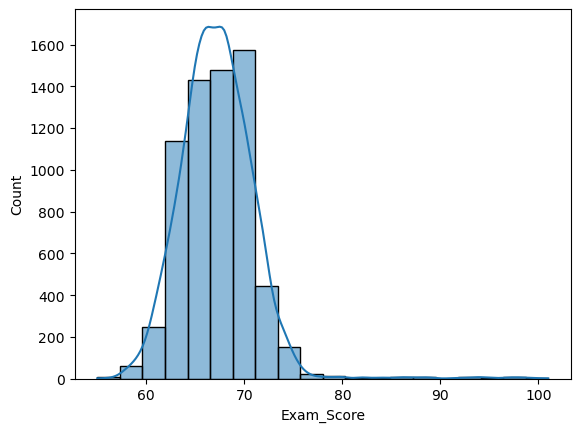

In [14]:
sns.histplot(df['Exam_Score'], bins=20, kde=True)

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

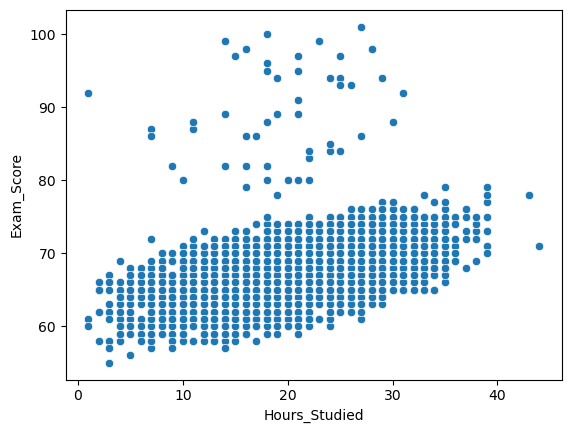

In [15]:
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

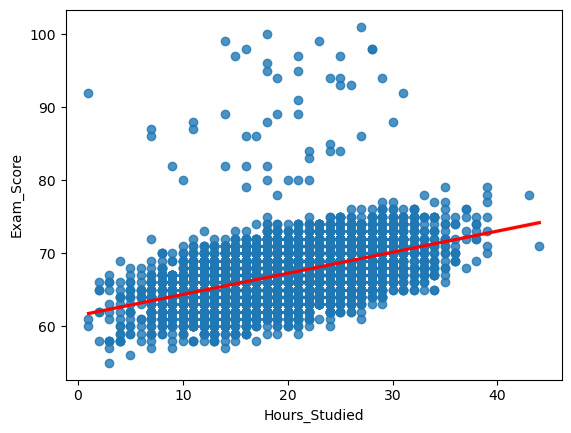

In [16]:
sns.regplot(x='Hours_Studied', y='Exam_Score', data=df, line_kws={'color':'red'})

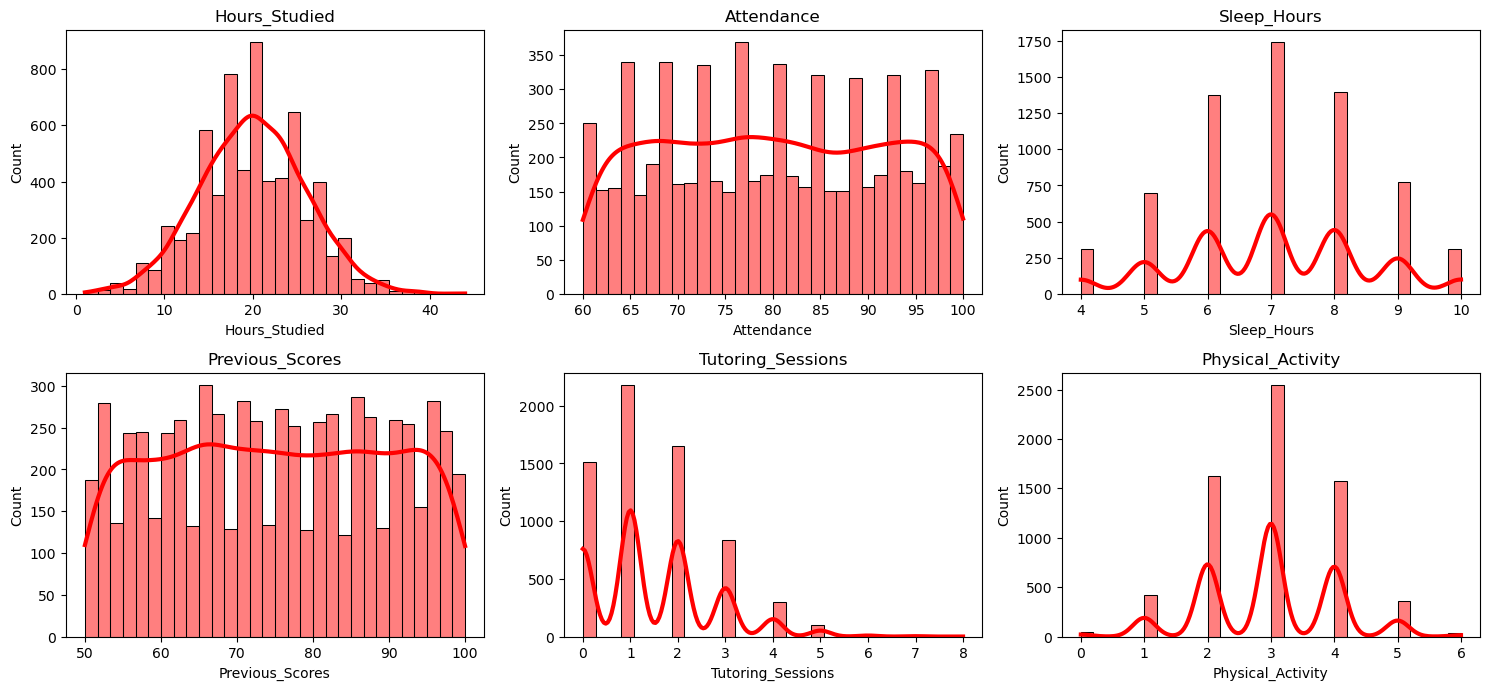

In [17]:
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours','Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity'] 

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col],
                 kde=True,
                 bins=30,
                 color="red",
                 line_kws={"linewidth": 3}
                )
    plt.title(col)



plt.tight_layout()
plt.show()

# correlation Analysis

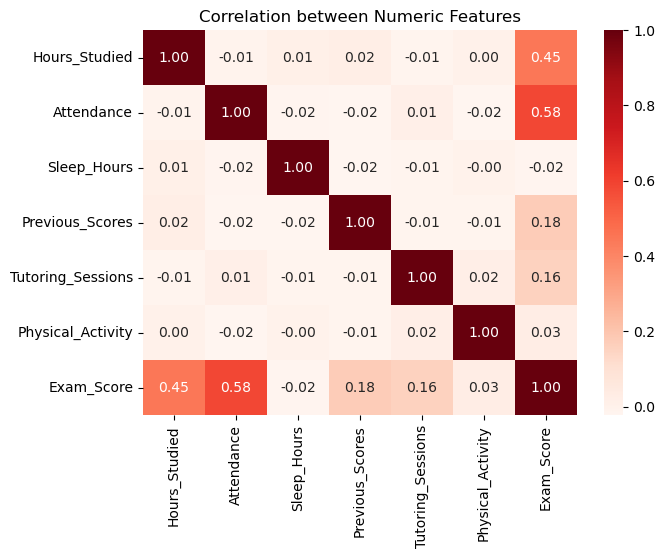

In [18]:
cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours',
        'Previous_Scores', 'Tutoring_Sessions',
        'Physical_Activity', 'Exam_Score']

# Compute correlation matrix
corr = df[cols].corr()

# Plot heatmap with red shades
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap="Reds", fmt=".2f")
plt.title("Correlation between Numeric Features")
plt.show()

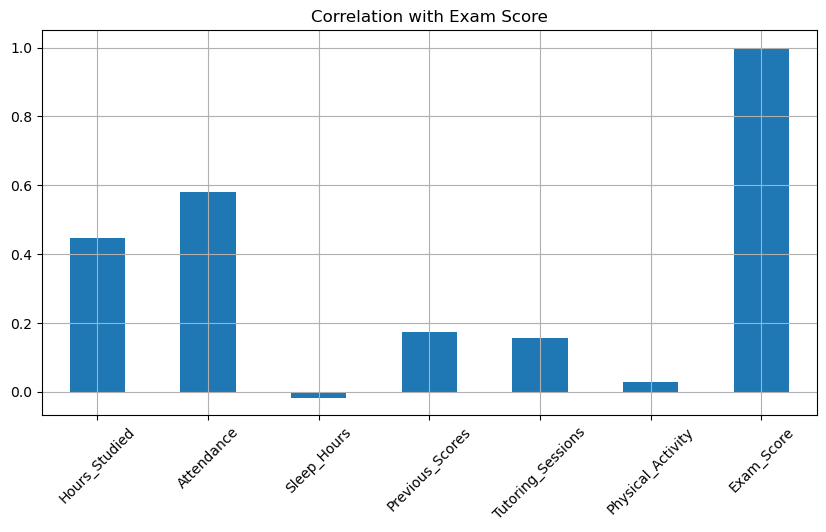

In [19]:
corr = df.corrwith(df['Exam_Score'], numeric_only=True)

corr.plot.bar(
    figsize=(10, 5),
    title='Correlation with Exam Score',
    rot=45,
    grid=True
)
plt.show()

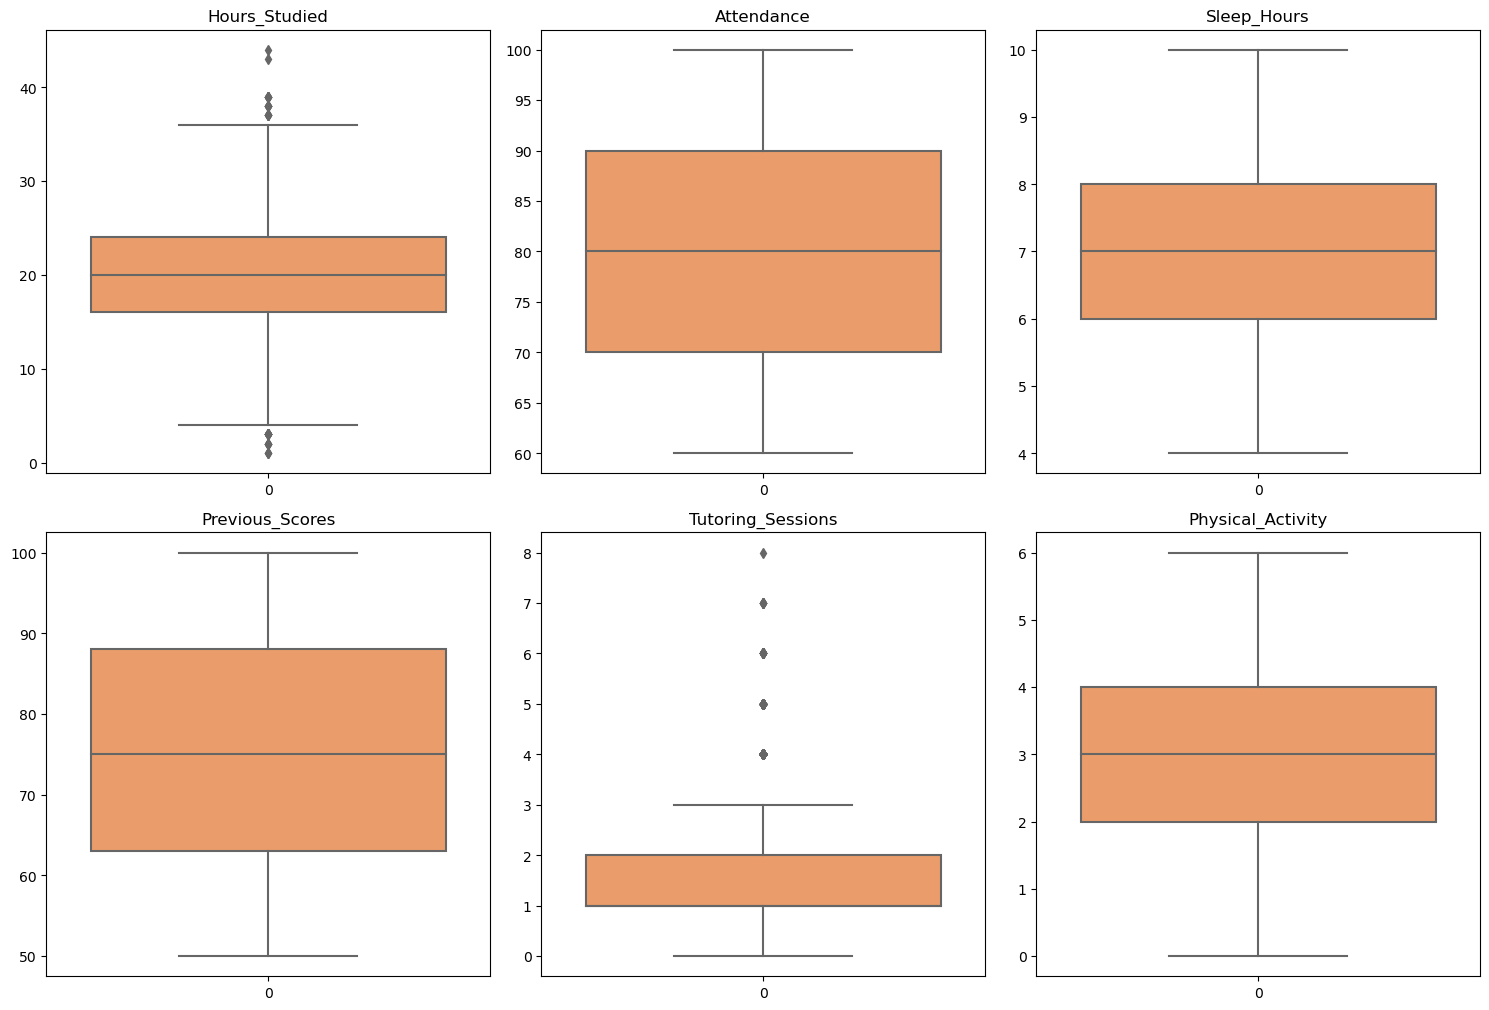

In [20]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[col],
                 color="#ff9955",
                )
    plt.title(col)



plt.tight_layout()
plt.show()

# Remove Outliers

In [21]:
numeric_cols = df.select_dtypes(include=np.number).columns

original_rows = df.shape[0]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

In [22]:
rows_after = df.shape[0]
rows_removed = original_rows - rows_after

In [23]:
print(f"Original rows: {original_rows}")
print(f"Rows after outlier removal: {rows_after}")
print(f"Rows removed: {rows_removed}")

Original rows: 6607
Rows after outlier removal: 6054
Rows removed: 553


# Data Distribution

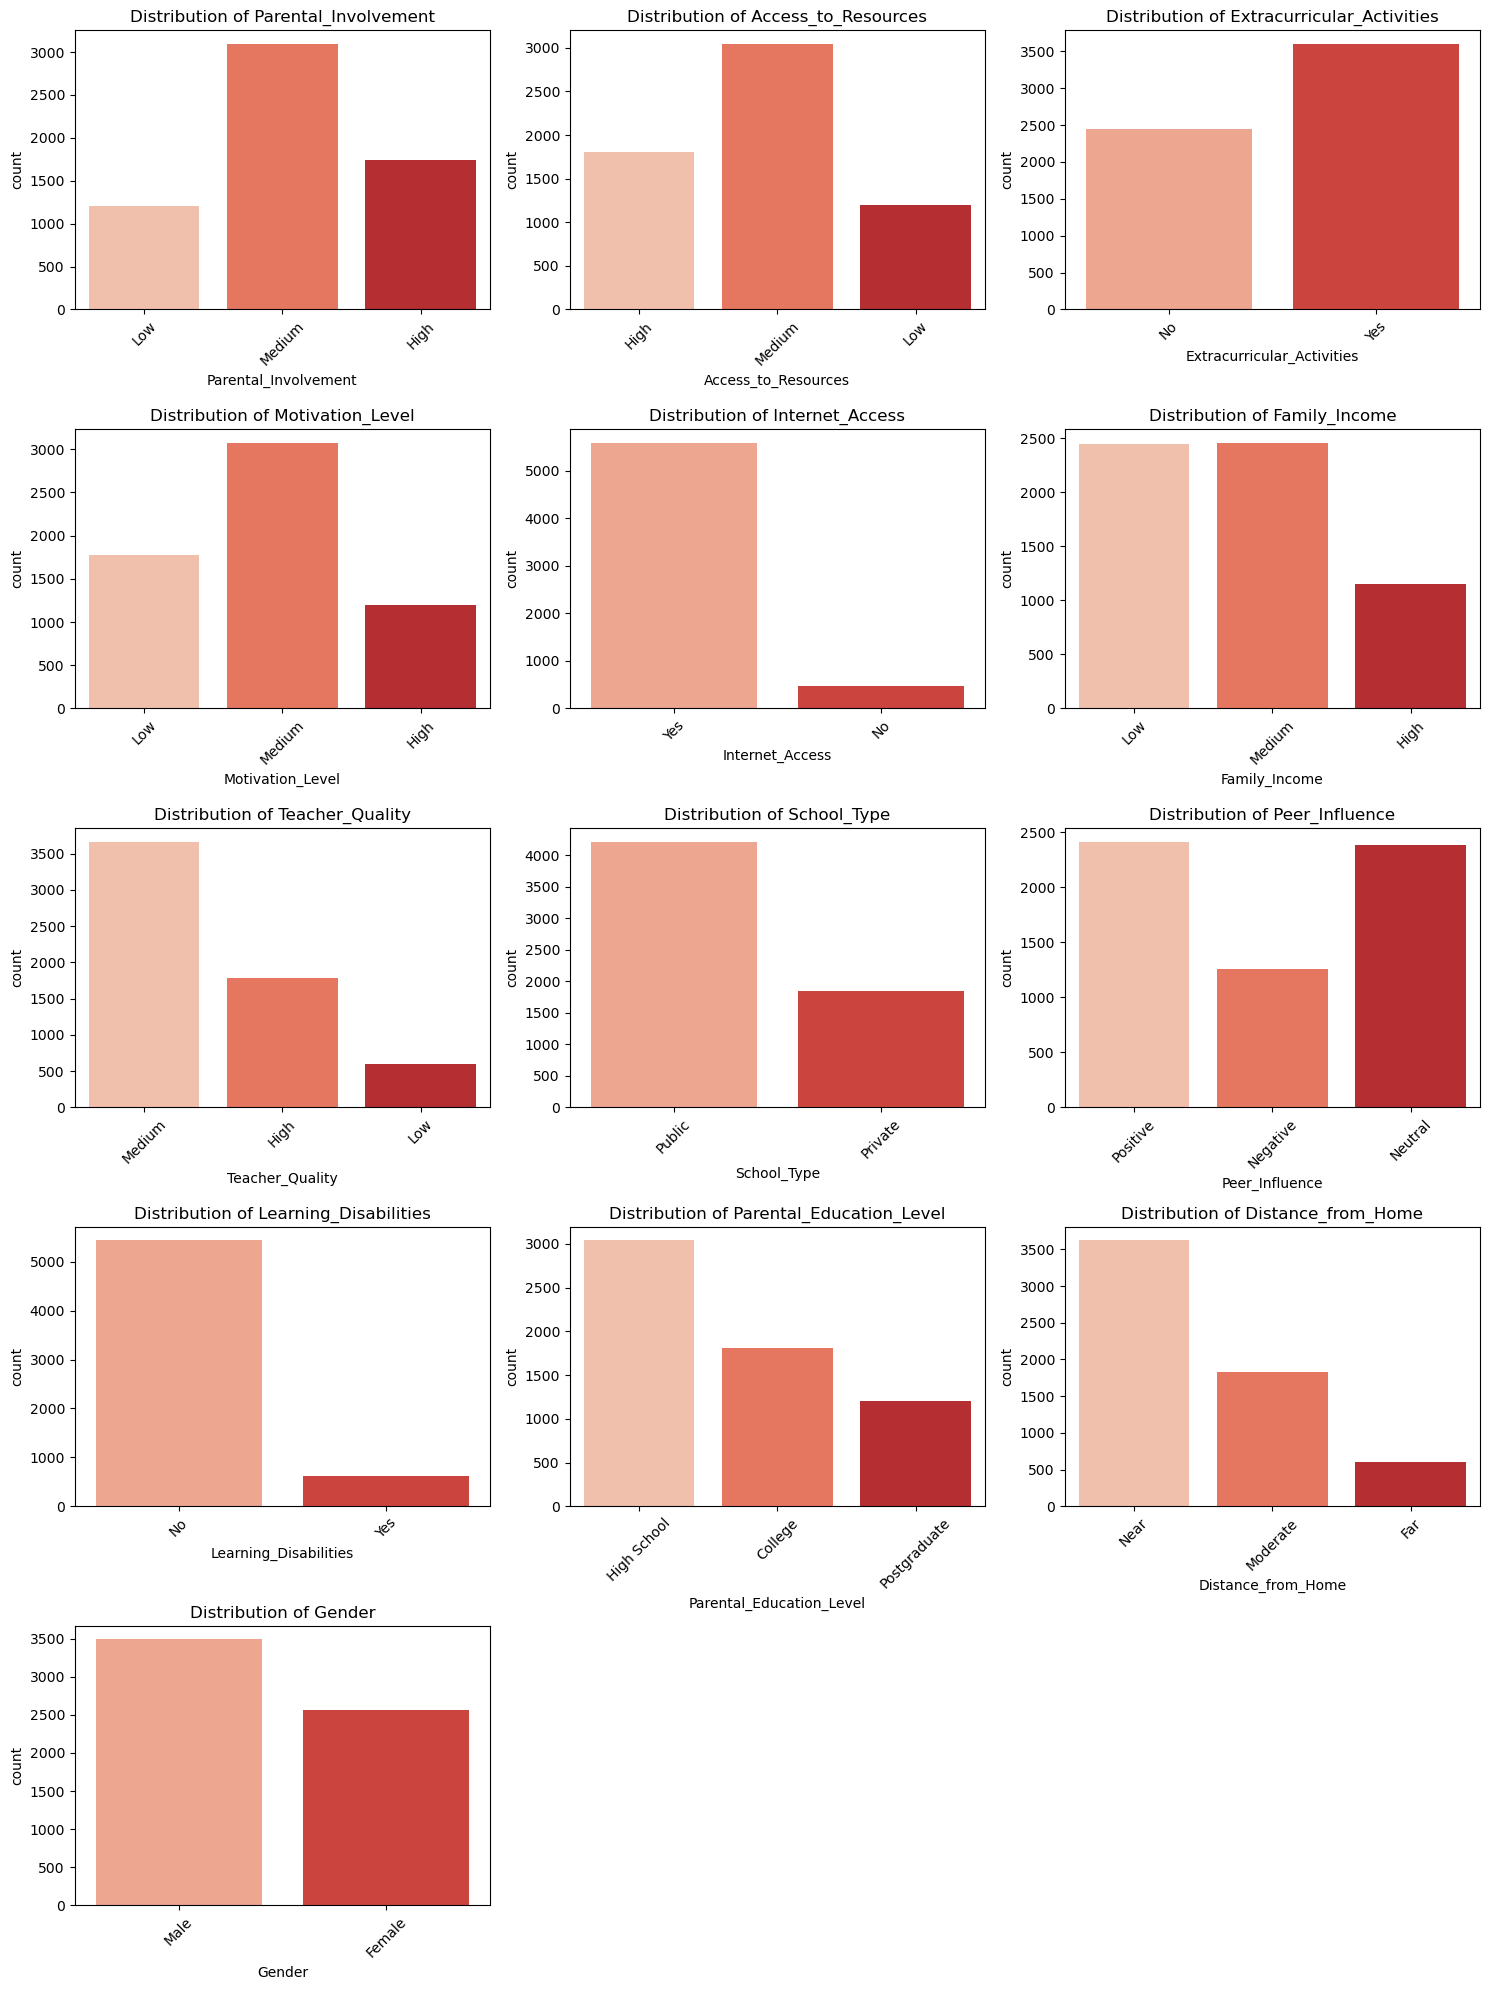

In [24]:
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                    'Parental_Education_Level', 'Distance_from_Home', 'Gender']

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x=col, palette='Reds')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Model Building

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Split data into train and test set

In [28]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape

(4843, 19)

In [35]:
X_test.shape

(1211, 19)

In [36]:
y_train.shape

(4843,)

In [37]:
y_test.shape

(1211,)

# Linear Regression

In [44]:
numeric_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
categorical_features = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                    'Parental_Education_Level', 'Distance_from_Home', 'Gender']

In [45]:
## Preprocessor
Preprocessor= ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
    
])

In [70]:
#Pipeline
linear_pipeline = Pipeline([
    ('preprocess', Preprocessor),
    ('regressor', LinearRegression())
    
])    

In [47]:
##Train model

In [71]:
linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Hours_Studied',
                                                   'Attendance', 'Sleep_Hours',
                                                   'Previous_Scores',
                                                   'Tutoring_Sessions',
                                                   'Physical_Activity']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Extracurricular_Activities',
                                                   'Motivation_Level',
                                                   'Internet_Access',
                                                   'Family_Income',
                                                   'Teacher_Quality',
                                                   'School_Type',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home',
                                                   'Gender'])])),
                ('regressor', LinearRegression())])

# Model Evaluation

In [72]:
y_pred = linear_pipeline.predict(X_test)

In [73]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [74]:
print('\nModel Performance:')
print(f'MAE : {mae: .4f}')
print(f'MSE : {mse: .4f}')
print(f'RMSE : {rmse: .4f}')
print(f'R2 : {r2: .4f}')


Model Performance:
MAE :  0.2747
MSE :  0.1069
RMSE :  0.3270
R2 :  0.9893


In [75]:
y_train_pred = linear_pipeline.predict(X_train)
y_test_pred = linear_pipeline.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² on training set: {r2_train:.4f}")
print(f"R² on test set: {r2_test:.4f}")

R² on training set: 0.9899
R² on test set: 0.9893


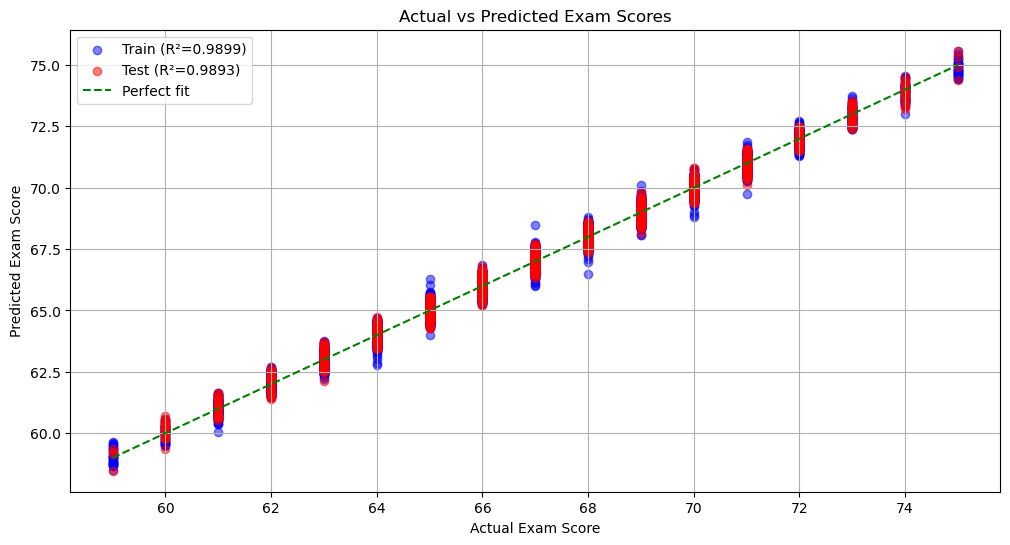

In [76]:
y_train_pred = linear_pipeline.predict(X_train)
y_test_pred = linear_pipeline.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


plt.figure(figsize=(12, 6))


plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label=f'Train (R²={r2_train:.4f})')
# Test set plot
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5, label=f'Test (R²={r2_test:.4f})')

max_val = max(y_train.max(), y_test.max())
min_val = min(y_train.min(), y_test.min())
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', label='Perfect fit')

plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted Exam Scores')
plt.legend()
plt.grid(True)
plt.show()

## Polynomial Regression

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
numeric_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
categorical_features = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                    'Parental_Education_Level', 'Distance_from_Home', 'Gender']

In [58]:
Preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])


In [59]:
poly_pipeline = Pipeline([
    ('preprocessor', Preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

In [60]:
# Fit the model
poly_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Hours_Studied',
                                                   'Attendance', 'Sleep_Hours',
                                                   'Previous_Scores',
                                                   'Tutoring_Sessions',
                                                   'Physical_Activity']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Extracurricular_Activities',
                                                   'Motivation_Level',
                                                   'Internet_Access',
                                                   'Family_Income',
                                                   'Teacher_Quality',
                                                   'School_Type',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home',
                                                   'Gender'])])),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('regressor', LinearRegression())])

# Model Evaluation

In [61]:
y_train_pred = poly_pipeline.predict(X_train)
y_test_pred = poly_pipeline.predict(X_test)

In [63]:
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

In [67]:
print("\nModel Performance:")
print(f'MAE: {mae_test:.4f}')
print(f'MSE: {mse_test:.4f}')
print(f'RMSE: {rmse_test:.4f}')
print(f'R²: {r2_test:.4f}')


Model Performance:
MAE: 0.2880
MSE: 0.1186
RMSE: 0.3444
R²: 0.9882


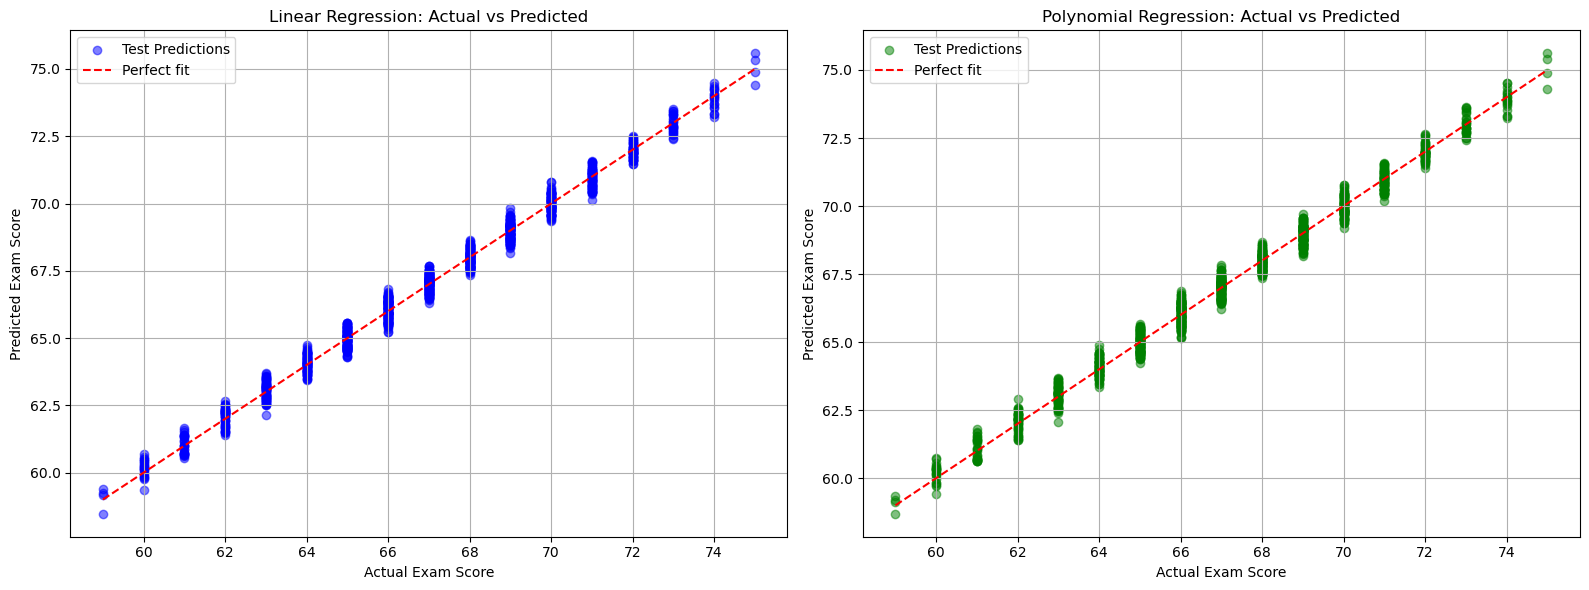

In [69]:
y_train_pred_linear = model.predict(X_train)
y_test_pred_linear = model.predict(X_test)

y_train_pred_poly = poly_pipeline.predict(X_train)
y_test_pred_poly = poly_pipeline.predict(X_test)


plt.figure(figsize=(16, 6))

# Linear Regression plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_linear, color='blue', alpha=0.5, label='Test Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect fit')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.legend()
plt.grid(True)

# Polynomial Regression plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_poly, color='green', alpha=0.5, label='Test Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect fit')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [77]:
import joblib

# Save linear pipeline
joblib.dump(linear_pipeline, 'student_performance_linear_pipeline.pkl')

# Save polynomial pipeline
joblib.dump(poly_pipeline, 'student_performance_poly_pipeline.pkl')

print("Both pipelines saved successfully!")


Both pipelines saved successfully!


In [78]:
numeric_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                    'Tutoring_Sessions', 'Physical_Activity']

categorical_features = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                        'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                        'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                        'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [82]:
import pandas as pd


X_new = pd.DataFrame({
    'Hours_Studied': [6, 9],
    'Attendance': [92, 88],
    'Sleep_Hours': [7, 6],
    'Previous_Scores': [80, 95],
    'Tutoring_Sessions': [1, 3],
    'Physical_Activity': [1, 0],
    'Parental_Involvement': ['High', 'Medium'],
    'Access_to_Resources': ['High', 'Medium'],
    'Extracurricular_Activities': ['Yes', 'No'],
    'Motivation_Level': ['High', 'Medium'],
    'Internet_Access': ['Yes', 'Yes'],
    'Family_Income': ['Medium', 'Low'],
    'Teacher_Quality': ['High', 'Medium'],
    'School_Type': ['Private', 'Public'],
    'Peer_Influence': ['Positive', 'Neutral'],
    'Learning_Disabilities': ['No', 'No'],
    'Parental_Education_Level': ['College', 'High School'],
    'Distance_from_Home': ['Near', 'Moderate'],
    'Gender': ['Male', 'Female']
})


In [83]:
# Linear regression predictions
y_linear_pred = linear_pipeline.predict(X_new)

# Polynomial regression predictions
y_poly_pred = poly_pipeline.predict(X_new)

print("Linear Regression Predictions:", y_linear_pred)
print("Polynomial Regression Predictions:", y_poly_pred)

Linear Regression Predictions: [68.8806036  64.99007781]
Polynomial Regression Predictions: [68.78644699 65.05031482]
